# MNIST Softmax Estimation

Note: This notebook is desinged to run with CPU (no GPU) runtime.

####[MSE-01]
Import modules.

In [7]:
import os, random
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

random.seed(20230515)
np.random.seed(20190825)
tf.random.set_seed(20190825)

####[MSE-02]
Download the MNIST dataset and store into NumPy arrays.

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

####[MSE-03]
Define a model for the softmax estimation.

In [9]:
model = models.Sequential()
model.add(layers.Input(shape=(28*28,), name='input'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ softmax (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

####[MSE-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MSE-05]
Train the model. It acheves around 92% accuracy for the test dataset.

In [11]:
%%time
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7253 - loss: 1.0452 - val_acc: 0.9012 - val_loss: 0.3868
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8982 - loss: 0.3789 - val_acc: 0.9125 - val_loss: 0.3218
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9113 - loss: 0.3249 - val_acc: 0.9175 - val_loss: 0.2985
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9170 - loss: 0.3018 - val_acc: 0.9215 - val_loss: 0.2867
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9199 - loss: 0.2885 - val_acc: 0.9223 - val_loss: 0.2798
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9224 - loss: 0.2798 - val_acc: 0.9230 - val_loss: 0.2753
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9239 - loss: 0.2734 - val_acc: 0.9248 - val_loss: 0.2722
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9255 - loss: 0.2685 - val_acc: 0.9255 - val_loss: 0.2701
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

####[MSE-06]
Show examples of the prediction result. Three for correct preditions and three for incorrect predictions.

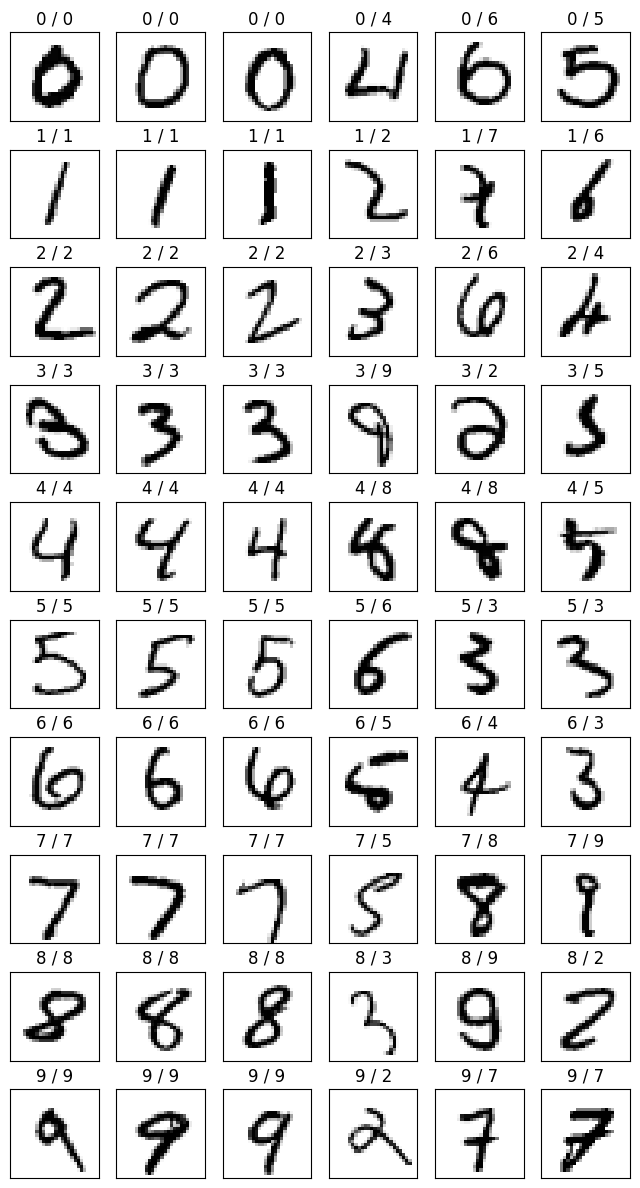

In [13]:
p_val = model.predict(np.array(test_images), verbose=0)
df = DataFrame({'pred': list(map(np.argmax, p_val)),
                'label': list(map(np.argmax, test_labels))})
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    indices = list(correct[correct['pred']==i].index[:3]) \
                + list(incorrect[incorrect['pred']==i].index[:3])
    for c, image in enumerate(test_images[indices]):
        subplot = fig.add_subplot(10, 6, i*6+c+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('{} / {}'.format(i, df['label'][indices[c]]))
        subplot.imshow(image.reshape((28, 28)),
                       vmin=0, vmax=1, cmap=plt.cm.gray_r)